In [64]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [121]:
# Read the data
df_btc = pd.read_csv("/Users/mz195/BTC_price_db.csv")
df_overall = pd.read_csv("/Users/mz195/overall_predictions.csv")

In [122]:
df = df_btc.merge(df_overall, on='time_')

df_overall["price_avg"]=df["price_avg"]
df_overall['overall'] = df_overall['overall'].shift(periods=-2)

df= df_overall.dropna()
df["diff"]=  df["overall"] - df["price_avg"]
df["Last_Updated_Signal"]=["NaN"]*len(df)

In [123]:
df

,time_,overall,price_avg,diff,Last_Updated_Signal
0,2021-06-30 23:01:30,34751.107751,34790.740667,-39.632915,NaN
1,2021-06-30 23:01:00,34748.785452,34772.246675,-23.461223,NaN
2,2021-06-30 23:00:30,34751.560387,34762.472233,-10.911846,NaN
3,2021-06-30 23:00:00,34748.769655,34767.591125,-18.821470,NaN
4,2021-06-30 22:59:30,34750.097632,34769.175600,-19.077968,NaN
...,...,...,...,...,...
115,2021-06-30 22:04:00,34723.829911,34751.887275,-28.057364,NaN
116,2021-06-30 22:03:30,34740.820525,34752.176367,-11.355842,NaN
117,2021-06-30 22:03:00,34752.973052,34756.373650,-3.400598,NaN
118,2021-06-30 22:02:30,34758.300133,34756.044333,2.255800,NaN


In [124]:
def update_signal(x):
    if x < 0:
        return "Resistance_Breakout"
    else:
        return "Support_Breakout"

In [125]:
df["Last_Updated_Signal"] = df["diff"].apply(update_signal)
df["Recommendation"]=["HOLD"]*len(df)

In [126]:

x=0
while x < (len(df)-1):
    
    if df["Last_Updated_Signal"].iloc[x]=="Support_Breakout" and df["Last_Updated_Signal"].iloc[x+1]=="Resistance_Breakout":
        df["Recommendation"].iloc[x+1]="SELL"
        
    elif df["Last_Updated_Signal"].iloc[x] == "Resistance_Breakout" and df["Last_Updated_Signal"].iloc[x+1]=="Support_Breakout":
        df["Recommendation"].iloc[x+1]="BUY"
        
    else:
        df["Recommendation"].iloc[x+1]="HOLD"
        
    x=x+1

In [127]:
df

,time_,overall,price_avg,diff,Last_Updated_Signal,Recommendation
0,2021-06-30 23:01:30,34751.107751,34790.740667,-39.632915,Resistance_Breakout,HOLD
1,2021-06-30 23:01:00,34748.785452,34772.246675,-23.461223,Resistance_Breakout,HOLD
2,2021-06-30 23:00:30,34751.560387,34762.472233,-10.911846,Resistance_Breakout,HOLD
3,2021-06-30 23:00:00,34748.769655,34767.591125,-18.821470,Resistance_Breakout,HOLD
4,2021-06-30 22:59:30,34750.097632,34769.175600,-19.077968,Resistance_Breakout,HOLD
...,...,...,...,...,...,...
115,2021-06-30 22:04:00,34723.829911,34751.887275,-28.057364,Resistance_Breakout,HOLD
116,2021-06-30 22:03:30,34740.820525,34752.176367,-11.355842,Resistance_Breakout,HOLD
117,2021-06-30 22:03:00,34752.973052,34756.373650,-3.400598,Resistance_Breakout,HOLD
118,2021-06-30 22:02:30,34758.300133,34756.044333,2.255800,Support_Breakout,BUY


In [128]:
transactions_df = df[(df['Recommendation'] == "BUY") | (df['Recommendation'] == "SELL")]

In [129]:
transactions_df

,time_,overall,price_avg,diff,Last_Updated_Signal,Recommendation
20,2021-06-30 22:51:30,34796.317587,34762.800000,33.517587,Support_Breakout,BUY
59,2021-06-30 22:32:00,34763.995733,34795.226450,-31.230717,Resistance_Breakout,SELL
98,2021-06-30 22:12:30,34768.329538,34766.547467,1.782072,Support_Breakout,BUY
104,2021-06-30 22:09:30,34739.024100,34752.281933,-13.257834,Resistance_Breakout,SELL
118,2021-06-30 22:02:30,34758.300133,34756.044333,2.255800,Support_Breakout,BUY
119,2021-06-30 22:02:00,34759.806265,34781.645850,-21.839585,Resistance_Breakout,SELL


In [130]:
if len(transactions_df) > 3:
    if transactions_df["Recommendation"].iloc[0] == "SELL" or transactions_df["Recommendation"].iloc[len(transactions_df) -1] == "BUY":
        transactions_df.drop(index=transactions_df.index[0], axis=0,inplace=True)

check = transactions_df["Recommendation"].iloc[[0,-1]]
print(check)

20      BUY
119    SELL
Name: Recommendation, dtype: object


In [131]:
# Investment
amount= 100000

In [132]:
transactions_num = len(transactions_df)
transactions_fees = 0.5 # maybe we need to use if statements here
total_fees = transactions_num * transactions_fees

In [133]:
sell_email_notification = list(df.loc[df['Recommendation'] == "SELL"].index)
buy_email_notification = list(df.loc[df['Recommendation'] == "BUY"].index)

In [134]:
transactions_df["pct"]=["0"]*len(transactions_df)
transactions_df["runing_amount"]=[0]*len(transactions_df)

In [135]:
x=0
while x <= len(transactions_df)-1:
    if transactions_df["Recommendation"].iloc[x] == "SELL":
        transactions_df["pct"].iloc[x]=(transactions_df["price_avg"].iloc[x]-transactions_df["price_avg"].iloc[x-1])/transactions_df["price_avg"].iloc[x-1]
        if x<=1:
            transactions_df["runing_amount"].iloc[x]=(1+transactions_df["pct"].iloc[x])*amount
        else:
            transactions_df["runing_amount"].iloc[x]=(1+transactions_df["pct"].iloc[x])*transactions_df["runing_amount"].iloc[x-2]
    x=x+1

In [136]:
rtn_pct=(transactions_df["runing_amount"].iloc[-1])/ amount * 100
#dollar profit/loss
profit_loss= transactions_df["runing_amount"].iloc[-1] - amount

In [137]:
print(rtn_pct,"% \n",profit_loss,"\n")

100.12590761018045 % 
 125.90761018045305 



<AxesSubplot:>

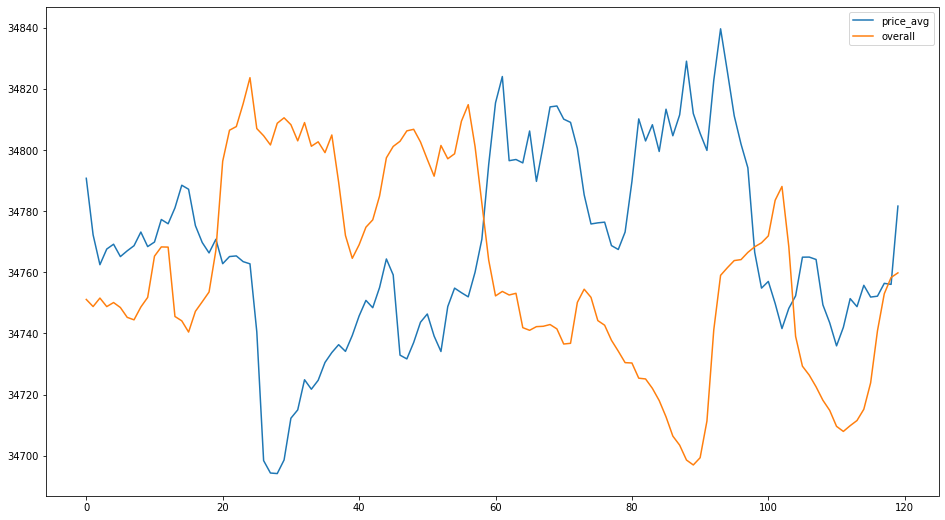

In [138]:
df[["price_avg","overall"]].plot(figsize=(16,9)) 